# Customer Service Dataset Part2-Perform basic data exploratory analysis:

In [1]:
import pandas as pd

In [2]:
data =pd.read_csv('/home/labsuser/Applied DS/311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

# Perform basic data exploratory analysis:

In [5]:
#following are the columns that does have nulls in all rows. SO we can drop them from dataframe
data.columns[data.isna().all()]

Index(['School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Garage Lot Name'],
      dtype='object')

In [3]:
#we can drop these 5 columns where all are NANs
newDF = data.dropna(axis=1, how='all')

In [4]:
newDF.shape # now new dataframe has 48 columns from the original 53 columns

(364558, 48)

# Analyze the date column and remove the entries if it has an incorrect timeline

In [ ]:
#for this lets convert date columns to datetime type

In [9]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [10]:
## There are 4 date columns named 
# Created Date
#Closed Date
#Due Date
#Resolution Action Updated Date
#Lets observe the first few rows for tehse values

newDF[['Created Date','Closed Date','Resolution Action Updated Date','Due Date']]

,Created Date,Closed Date,Resolution Action Updated Date,Due Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM
...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM


In [ ]:
# lets convert them to dateTime objects 
newDF['Created Date'] = pd.to_datetime(newDF['Created Date'],format='%m/%d/%Y %H:%M:%S %p');
newDF['Closed Date'] = pd.to_datetime(newDF['Closed Date'],format='%m/%d/%Y %H:%M:%S %p');
newDF['Resolution Action Updated Date'] = pd.to_datetime(newDF['Resolution Action Updated Date'],format='%m/%d/%Y %H:%M:%S %p');
newDF['Due Date'] = pd.to_datetime(newDF['Due Date'],format='%m/%d/%Y %H:%M:%S %p');

In [9]:
newDF.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [16]:
#All 4 of the date columns are  now changed to DateTime Types

In [10]:
newDF.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 11:59:45,2016-01-01 12:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 11:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 11:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 11:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 11:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# Draw a frequency plot for city-wise complaints

In [12]:
#extract city wide complainst data
cityComplaintsDF=newDF.filter(['City','Complaint Type'],axis=1)
cityComplaintsDF.isnull().sum() 

# City              2997
# Complaint Type       0
# dtype: int64
#There are 2997 null Cities for ComplaintType. So lets drop null fields

City              2997
Complaint Type       0
dtype: int64

In [15]:
cityComplaintsDF.dropna(inplace=True)
cityComplaintsDF.isnull().sum() ## all nulls are removed. total 36151 records

City              0
Complaint Type    0
dtype: int64

In [16]:
cityComplaintsDF.shape

(361561, 2)

In [ ]:
#citywise complaints bar plot 

In [22]:
cityComplaintsDF['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [11]:
#import matplot lib for plots
import matplotlib.pyplot as plt

<AxesSubplot:>

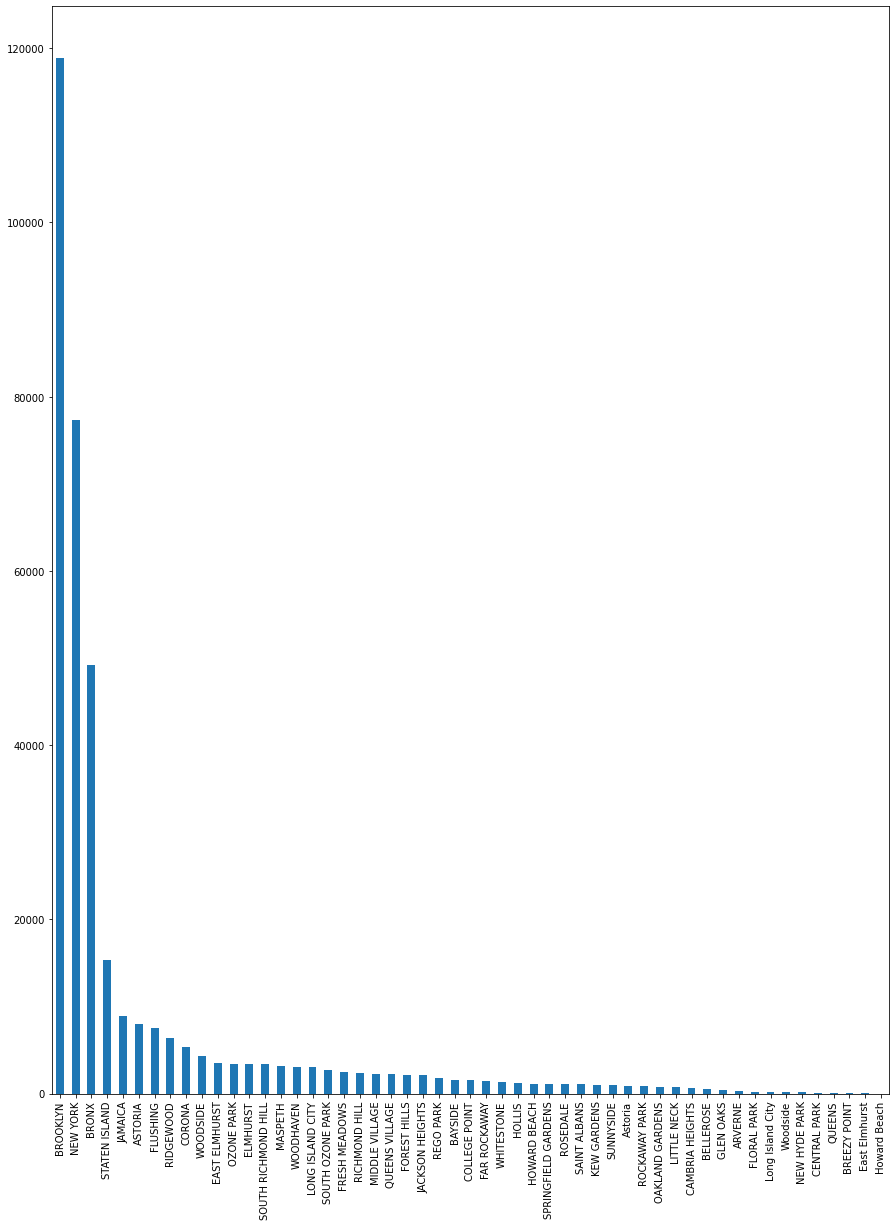

In [20]:
fig, ax = plt.subplots(figsize=(15,20))
plt.xticks(rotation=90)
cityComplaintsDF['City'].value_counts().plot(kind='bar')

<AxesSubplot:>

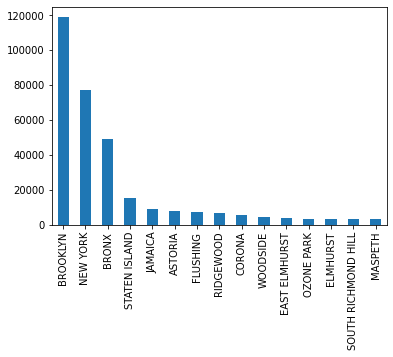

In [21]:
# Lets draw a plot for the top 15 cities that has more complaints
cityComplaintsDF['City'].value_counts()[:15].plot(kind='bar')


<AxesSubplot:ylabel='City'>

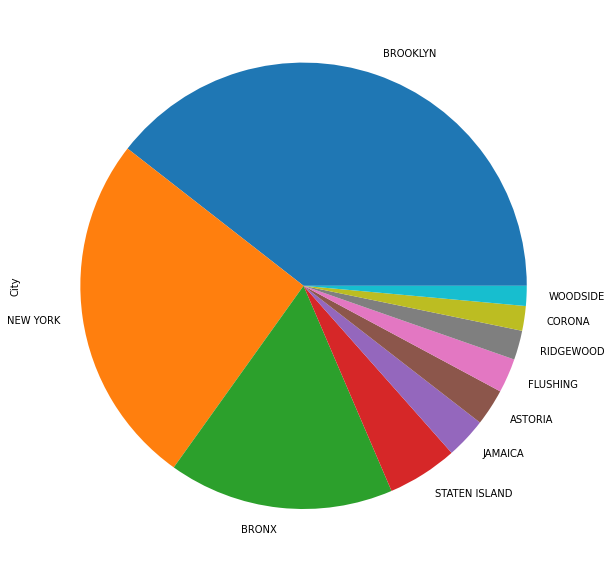

In [26]:
#lest do a pie chart 
fig, ax = plt.subplots(figsize=(10,15))
cityComplaintsDF['City'].value_counts().head(10).plot(kind='pie')

# Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [31]:
#extract Brooklyn dataframe
brooklynDF = newDF.loc[newDF['City'] == 'BROOKLYN']

In [32]:
brooklynDF.shape

(118862, 48)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

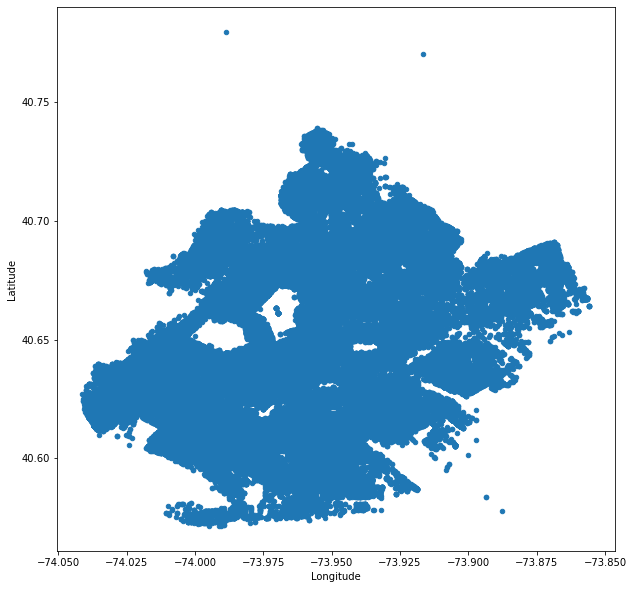

In [33]:
# scatter plot
brooklynDF[['Longitude', 'Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',figsize=(10,10))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

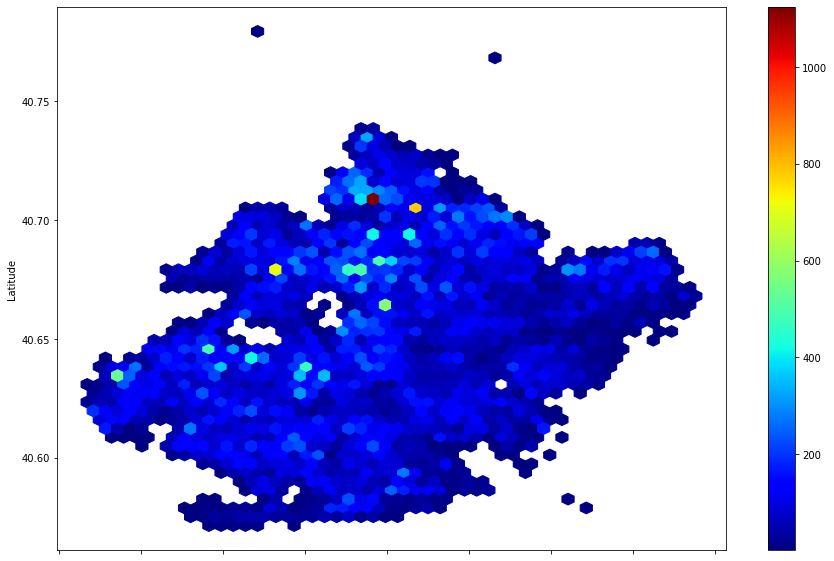

In [39]:
# Draw hexbin plot for complaint concentration across Brooklyn
# plt.figure(figsize=(10,10))
brklyDF[['Longitude', 'Latitude']].plot(kind='hexbin',x='Longitude',y='Latitude', gridsize=50, mincnt=1, colormap = 'jet',figsize=(15,10))